## Airline Passenger Satisfaction Data Analysis and Visualisation Project
**Team #27:** [Maryna Kostiuk](https://github.com/samamaryna), [Ying Li](https://github.com/yingliamanda), [Yinglin Zhang](https://github.com/Jolin0101), [Tetiana Nurkanova](https://github.com/nurkanovat)

Welcome to our second team project within Data Science Certificate. For this project we used the dataset [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). Within this project we will analyse data and answer such questions as: 
- What percentage of airline passengers are satisfied?
- Does satisfaction vary by customer type?
- What is the customer profile for a repeating airline passenger?
- Does flight distance affect customer preferences or flight patterns?
- Which factors contribute to customer satisfaction the most? What about dissatisfaction?
  
We hope that with the answers to this questions the airline company can improve the services and increase the satisfaction rate between customers. 


Unfortunately, the data source doesn't provide any information about the collection of data, sampling methods, and other details. We also couldn't find this information online. 

In [1]:
#to import librariers we will be working with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to import dataset into df and take a look at the first 5 rows of the data:

df = pd.read_csv('./data/raw/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Data exploration and cleaning

In [3]:
#to check how many rows and columns our dataframe has:
df.shape

(129880, 24)

In [4]:
# to see what columns look like
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [5]:
# to explore how many null values we have: 
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
#to remove null values from dataset

df.dropna(subset=['Arrival Delay'], inplace=True)

In [7]:
#to check for null values again

df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [8]:
#to check for duplicates

df.duplicated().sum()

0

## Exploratory Analysis
In this part of our project we will explore the data, correlation between different services and their impact to satisfaction, flying patterns for distance, and other questions to understand, how company can improve its satisfaction score. 

### What percentage of airline passengers are satisfied?
To answer this question we will be comparing the number of satisfied and neutral or dissatisfied customers. 

In [9]:
#to calculate the percentage of satisfied customers: 

satisf = df['Satisfaction'].value_counts()
satisf_percentages = round(satisf / satisf.sum() * 100, 2)

print(satisf_percentages)



Satisfaction
Neutral or Dissatisfied    56.55
Satisfied                  43.45
Name: count, dtype: float64


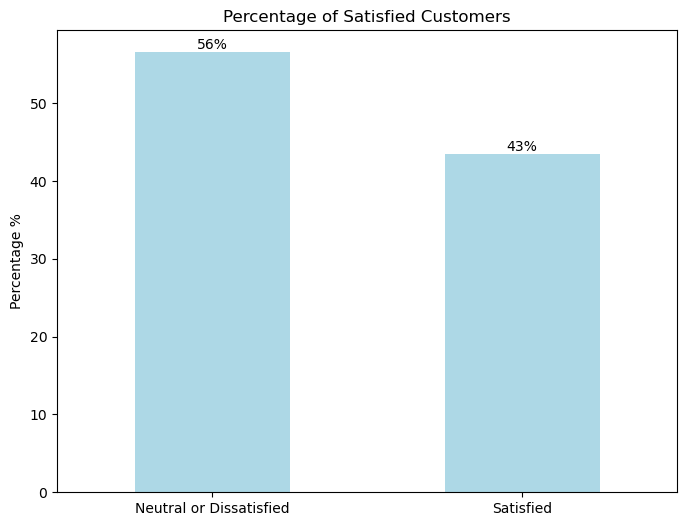

In [10]:
#to create a figure for our future visual:
plt.figure(figsize=(8, 6))

#to create a graph and assign the type of graph and color: 
bars = satisf_percentages.plot(kind='bar', color='lightblue')

#to assign the title and ylabel:
plt.title('Percentage of Satisfied Customers')
plt.ylabel('Percentage %')

#to leave xlabel empty:
plt.xlabel('')

#to assign the rotation for ticks to 0: 
plt.xticks(rotation=0)

#to place percentage values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            f'{int(yval)}%', 
            ha='center', 
            va='bottom')

plt.show()

The analysis shows that 43.5% of customers are satisfied with services that this airline company provides. 

"Typically, anything above 70% is considered a good customer satisfaction score, while a less-desirable score is anything below 50%. The average CSAT score across all industries is 78%, but that can vary widely depending on your industry, product, service, and customer base."-[What Is a Customer Satisfaction Score (CSAT)? by Katie Muse](https://www.salesforce.com/service/customer-service-incident-management/customer-satisfaction-score/)

We recommend to explore data more to find out, how what services can be improved to increase the satisfaction score. 

### Does satisfaction vary by customer type?
To answer this question we will be comparing satisfaction rate between Returning and First-time customers. 

Firstly, we want to compare number of Returning and First-time customers overall: 

In [11]:
#to check how many returning and first-time customers we have: 
cust_type = df['Customer Type'].value_counts()

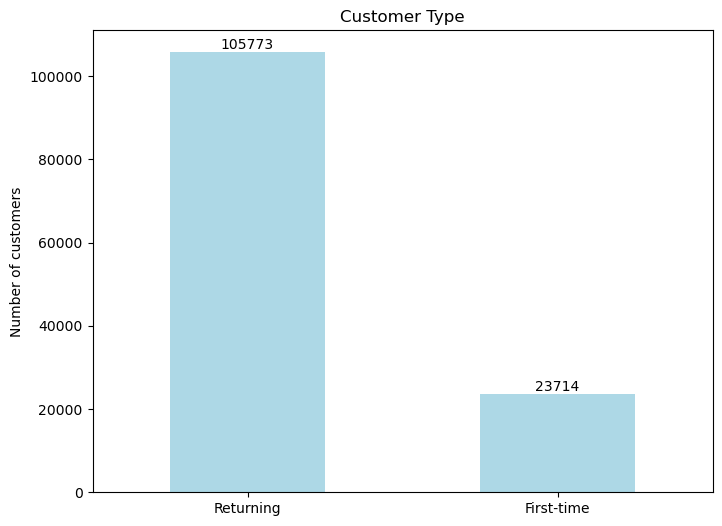

In [12]:
plt.figure(figsize=(8,6))
bars_custtype = cust_type.plot(kind='bar', color='lightblue')

plt.title('Customer Type')
plt.xlabel('')
plt.ylabel('Number of customers')
plt.xticks(rotation=0)

for bar in bars_custtype.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            int(yval), 
            ha='center', 
            va='bottom')

Next, we will be answering the question: 
### How many Returning customers are satisfied?

In [13]:
#how many Returning customers are satisfied: 
#to filter dataframe: 
returning_filter = df[df['Customer Type'] == 'Returning']

return_satisf = returning_filter['Satisfaction'].value_counts()

return_satisf_percent = round(return_satisf / return_satisf.sum() * 100, 2)

print(return_satisf_percent)


Satisfaction
Neutral or Dissatisfied    52.19
Satisfied                  47.81
Name: count, dtype: float64


### Percentage of Satisfaction for Returning Customers Visualisation
This visual shows the difference between satisfaction and dissatisfaction rates among Returning customers: 

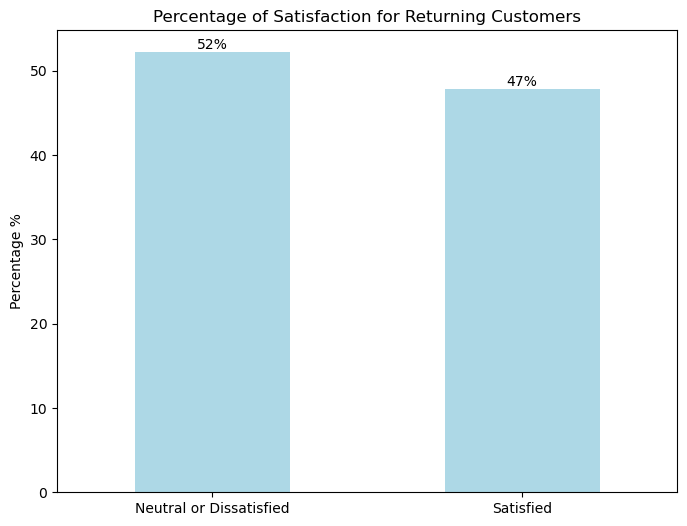

In [14]:
#to create a figure for our future visual:
plt.figure(figsize=(8, 6))

#to create a graph and assign the type of graph and color: 
ret_sat_bars = return_satisf_percent.plot(kind='bar', color='lightblue')

#to assign the title and ylabel:
plt.title('Percentage of Satisfaction for Returning Customers')
plt.ylabel('Percentage %')

#to leave xlabel empty:
plt.xlabel('')

#to assign the rotation for ticks to 0: 
plt.xticks(rotation=0)

#to place percentage values on top of the bars
for bar in ret_sat_bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            f'{int(yval)}%', 
            ha='center', 
            va='bottom')

plt.show()

Next, we need to find out:
### How many First-time customers are satisfied?

In [15]:
#to filter dataframe: 
ftime_filter = df[df['Customer Type'] == 'First-time']

ftime_satisf = ftime_filter['Satisfaction'].value_counts()

ftime_satisf_percent = round(ftime_satisf / ftime_satisf.sum() * 100, 2)

print(ftime_satisf_percent)


Satisfaction
Neutral or Dissatisfied    76.01
Satisfied                  23.99
Name: count, dtype: float64


##### Percentage of Satisfaction for First-time Customers Visualisation

This visual shows the difference in satisfaction rate between First-time customers

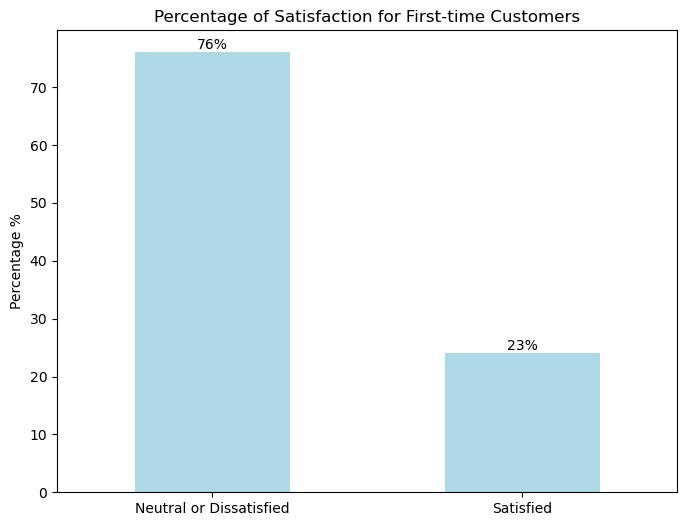

In [16]:
#to create a figure for our future visual:
plt.figure(figsize=(8, 6))

#to create a graph and assign the type of graph and color: 
ftime_sat_bars = ftime_satisf_percent.plot(kind='bar', color='lightblue')

#to assign the title and ylabel:
plt.title('Percentage of Satisfaction for First-time Customers')
plt.ylabel('Percentage %')

#to leave xlabel empty:
plt.xlabel('')

#to assign the rotation for ticks to 0: 
plt.xticks(rotation=0)

#to place percentage values on top of the bars
for bar in ftime_sat_bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            f'{int(yval)}%', 
            ha='center', 
            va='bottom')

plt.show()

The satisfaction rate for Returning customers(47%) are much higher than for First-time customers (23%). But even for the Returning customers the rate is still below the 70% which is considered as a good satisfaction rate (according to Katie Muse from the source above). We need to explore data more, to find out what services the company can improve. 

# Does flight distance affect customer preferences or flight patterns?

In [17]:
# ensure the Flight Distance to numeric and remove all the blanks.
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
df = df.dropna(subset=['Flight Distance','Class'])

In [18]:
# Define the order from the 'Class' column
class_order = ['Economy', 'Economy Plus', 'Business']

# Reorder the 'Class' column
df['Class'] = pd.Categorical(df['Class'],categories=class_order, ordered=True)

Text(0, 0.5, 'Class')

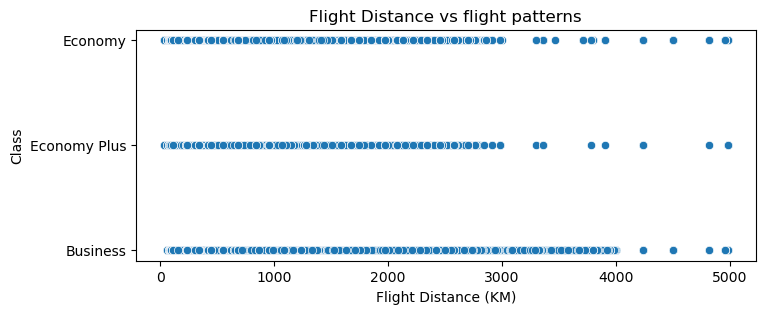

In [19]:
plt.figure(figsize=(8,3))
sns.scatterplot(x ='Flight Distance', y = 'Class',data = df)

# Add title and label
plt.title('Flight Distance vs flight patterns')
plt.xlabel('Flight Distance (KM)')
plt.ylabel('Class')

If the flight distance is less than 3000 km, the flight patterns are similar. However, for distances greater than 3000 km, a higher proportion of passengers choose business class.

# Flight distance vs passenger satisfaction

In [20]:
# Clean the blanks from Flight Distance and Satisfaction
df = df.dropna(subset=['Flight Distance','Satisfaction'])

In [21]:
# Binning the flight distance every 500 KM
bins = range(0,5000,500)
labels = [f'{b} - {b+500}' for b in bins[:-1]]
df['Distance Range(KM)'] = pd.cut(df['Flight Distance'], bins = bins, labels = labels, right = False)

In [22]:
# Grouping by the Distance Range and satisfaction to get the count
df_grouped_bins = df.groupby(['Distance Range(KM)','Satisfaction']).size().unstack(fill_value=0)
df_grouped_bins = df_grouped_bins[['Satisfied','Neutral or Dissatisfied']]

# Calculate the ppercentage
df_percentage = df_grouped_bins.div(df_grouped_bins.sum(axis=1),axis=0) * 100

C:\Users\jolin\AppData\Local\Temp\ipykernel_7880\3104035252.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_bins = df.groupby(['Distance Range(KM)','Satisfaction']).size().unstack(fill_value=0)


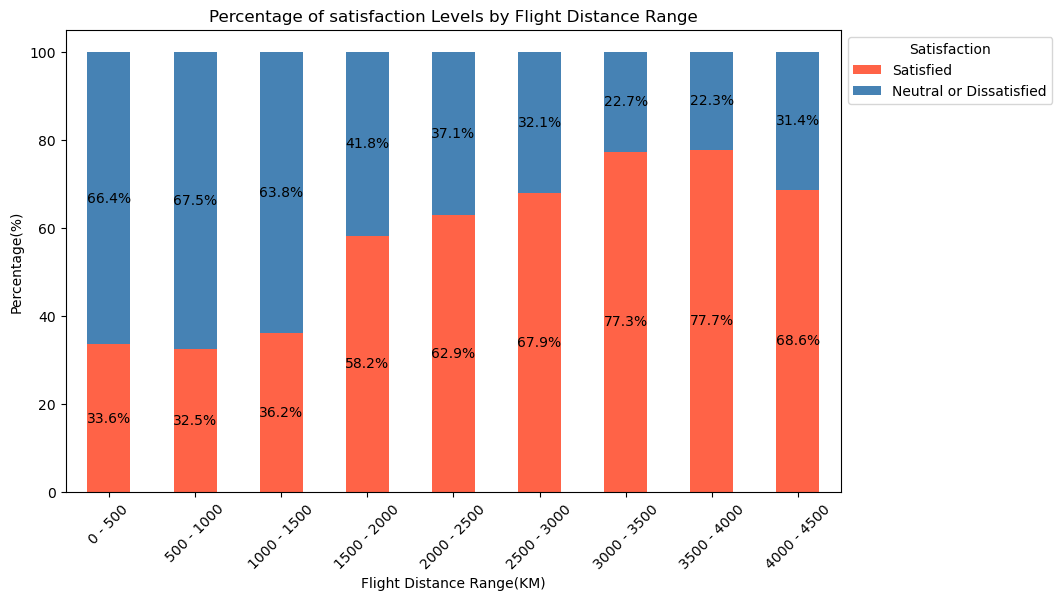

In [24]:
# Plotting the percentage data as a stacked column chart
ax=df_percentage.plot(kind = 'bar', stacked=True, figsize=(10,6), color=['#FF6347','#4682B4'])
plt.title('Percentage of satisfaction Levels by Flight Distance Range')
plt.xlabel('Flight Distance Range(KM)')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction',loc='upper left',bbox_to_anchor=(1,1))

# Adding percentage labels on the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', color='black', fontsize=10)

plt.show()

When the flight distance is less than 4000 KM, greater flight distance is associated with higher satisfaction.

# Departure Delay and Arrival Delay vs Satisfaction

In [25]:
# Clean the blanks from Departure Delay, Arrival Dealy and Satisfaction
df = df.dropna(subset=['Departure Delay','Arrival Delay','Satisfaction'])

In [26]:
# Convert dissatisfaction levels to binary (1 for dissatisfaction, 0 for satisfaction)
df['Neutral or Dissatisfied'] = df['Satisfaction'].apply(lambda x: 1 if x == 'Neutral or Dissatisfied' else 0)

In [27]:
# Define delay ranges
delay_ranges = {
    '<30': (0,30),
    '30-60': (30,60),
    '60-90': (60,90),
    '90-120': (90,120),
    '>120': (120, float('inf'))
}

In [28]:
# Function to categorize delays
def categorize_delay(delay,ranges):
    for label, (low, high) in ranges.items():
        if low <=delay <high:
            return label
    return '>120'

In [29]:
# Apply categorization
df['Departure Delay Range'] = df['Departure Delay'].apply(lambda x: categorize_delay(x,delay_ranges))
df['Arrival Delay Range'] = df['Arrival Delay'].apply(lambda x: categorize_delay(x, delay_ranges))

In [30]:
# Group by delay ranges and calculate dissatisfaction rates
grouped = df.groupby(['Departure Delay Range','Arrival Delay Range'])['Neutral or Dissatisfied'].mean().reset_index()

# Define the desired order for Departure Delay Range and Arrival Delay Range
Ordered_departure_delay = ['>120','90-120','60-90','30-60','<30']
Ordered_arrival_delay = ['<30','30-60','60-90','90-120','>120']

#Pivot tale for heatmap
heatmap_data = grouped.pivot(index='Departure Delay Range',columns = 'Arrival Delay Range', values='Neutral or Dissatisfied')
heatmap_data = heatmap_data.reindex(index=Ordered_departure_delay,columns=Ordered_arrival_delay)

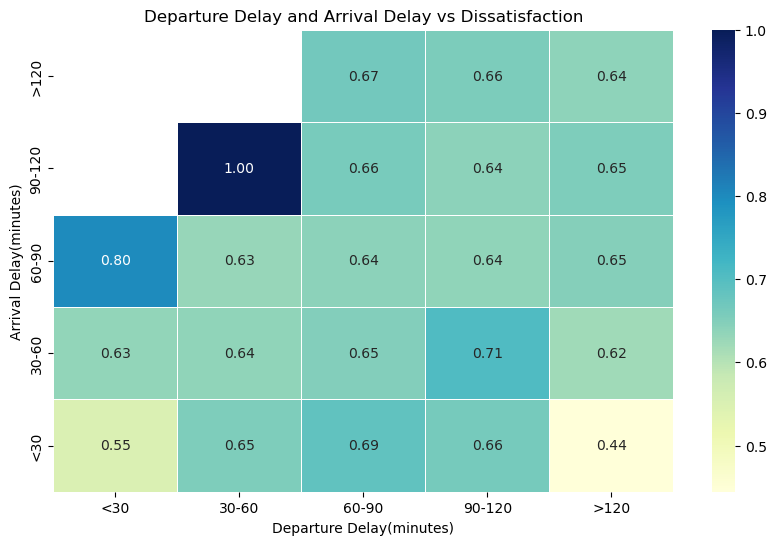

In [31]:
# Plotting the scatter plot
plt.figure(figsize = (10,6))
sns.heatmap(heatmap_data,annot=True, cmap='YlGnBu',fmt='.2f',linewidths=.5)
plt.title('Departure Delay and Arrival Delay vs Dissatisfaction')
plt.xlabel('Departure Delay(minutes)')
plt.ylabel('Arrival Delay(minutes)')
plt.show()

The departure and arrival delays contribute to dissatisfaction, but they do not show a significant change across different delay intervals. The peak in dissatisfaction occurs when the departure delay is between 30-60 minutes and the arrival delay is between 90-120 minutes.